In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Python_projects\\Материалы\\german_used_cars.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [2]:
df.describe()

,Unnamed: 0,mileage_in_km
count,251079.000000,2.509270e+05
mean,125539.000000,8.534002e+04
std,72480.408456,7.871706e+04
min,0.000000,0.000000e+00
25%,62769.500000,2.490400e+04
50%,125539.000000,6.750000e+04
75%,188308.500000,1.265000e+05
max,251078.000000,3.800000e+06


Т.е весь наш анализ мы можем делать по двум столбцам: `price_in_euro` и `mileage_in_km`.


In [3]:
df.isna().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [4]:
df['price_in_euro'] = df['price_in_euro'].str.replace(',','.')
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


Здесь мы приводим данные в числовый вид. Удаляем нулевые байты

In [5]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990.0,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690.0,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521.0,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890.0,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [6]:
df_statitscs =df.copy()
df_statitscs.describe()

,Unnamed: 0,price_in_euro,mileage_in_km
count,251079.000000,2.508800e+05,2.509270e+05
mean,125539.000000,2.613753e+04,8.534002e+04
std,72480.408456,3.698795e+04,7.871706e+04
min,0.000000,1.200000e+02,0.000000e+00
25%,62769.500000,1.199000e+04,2.490400e+04
50%,125539.000000,1.989000e+04,6.750000e+04
75%,188308.500000,2.995000e+04,1.265000e+05
max,251078.000000,5.890500e+06,3.800000e+06


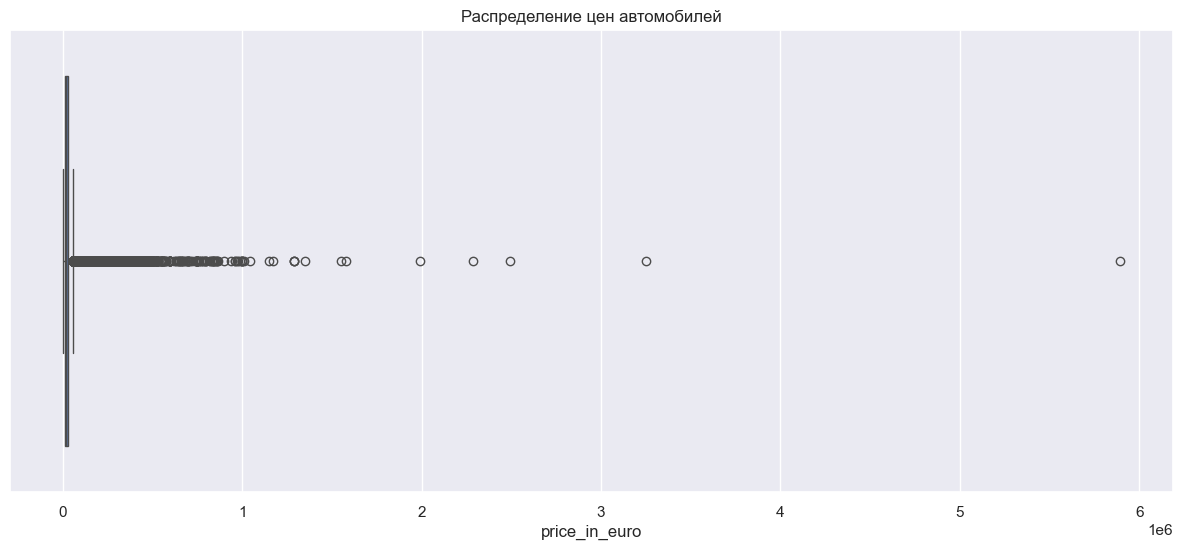

In [7]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,6))
sns.boxplot(x='price_in_euro', data=df)
plt.title('Распределение цен автомобилей')
plt.show();

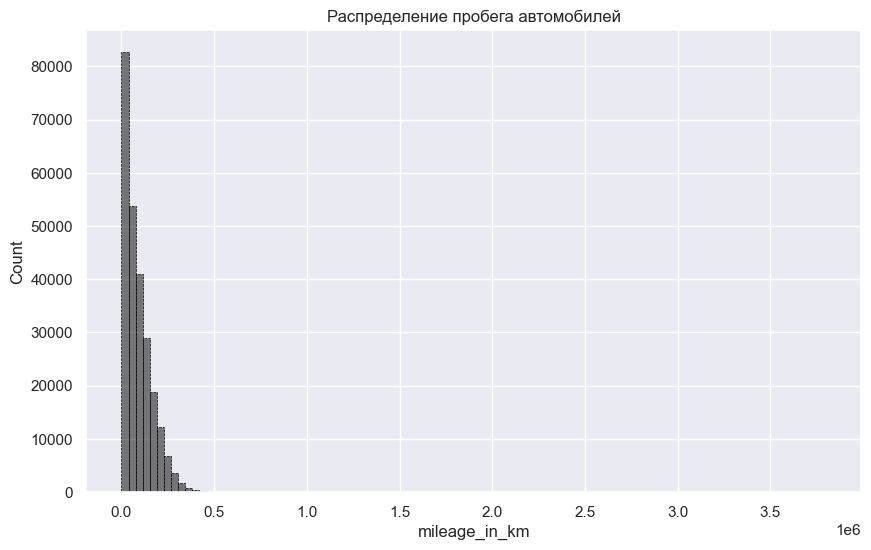

In [8]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(df['mileage_in_km'], bins=100, color='black', edgecolor='black', lw=10, ls='--', alpha=0.5)
plt.title('Распределение пробега автомобилей')
plt.show();

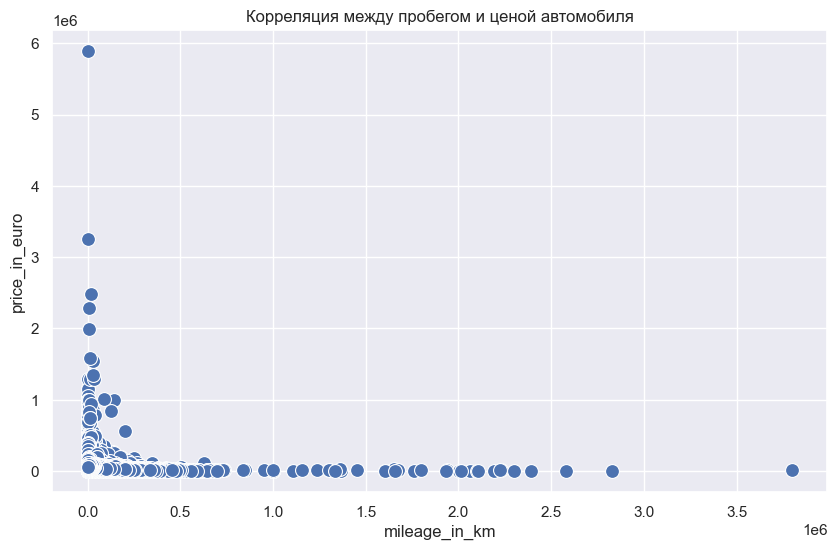

In [9]:
# Просмотр корреляции между столбцами
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage_in_km', y='price_in_euro', data=df, s=100)
plt.title('Корреляция между пробегом и ценой автомобиля')
plt.show();

In [10]:
print(f'Среднее {df[['price_in_euro', 'mileage_in_km']].mean()}')

print(f'Медиана {df[['price_in_euro', 'mileage_in_km']].median()}')

print(f'Мода {df[['price_in_euro', 'mileage_in_km']].mode()}')

Среднее price_in_euro    26137.530002
mileage_in_km    85340.015985
dtype: float64
Медиана price_in_euro    19890.0
mileage_in_km    67500.0
dtype: float64
Мода    price_in_euro  mileage_in_km
0        19990.0           10.0


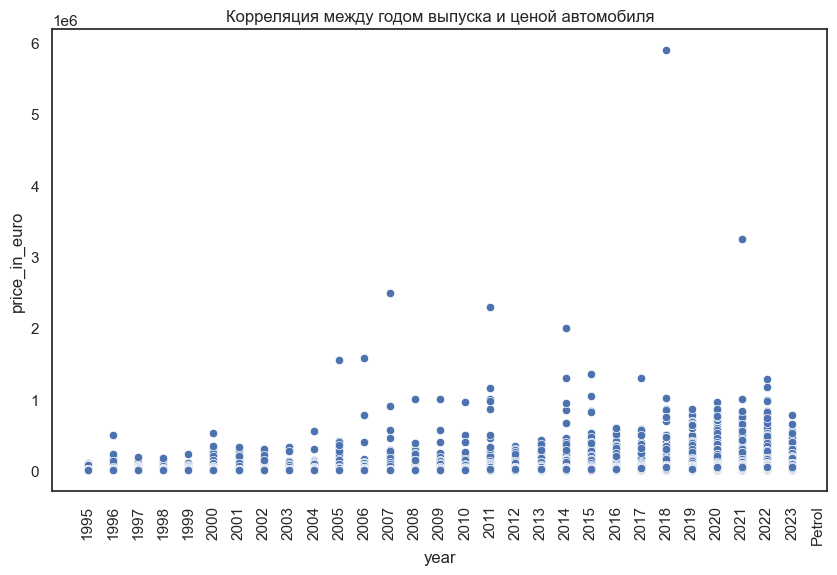

In [11]:
sns.set(style = 'white')
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='price_in_euro', data=df)
plt.xticks(rotation=90)
plt.title('Корреляция между годом выпуска и ценой автомобиля')
plt.show()

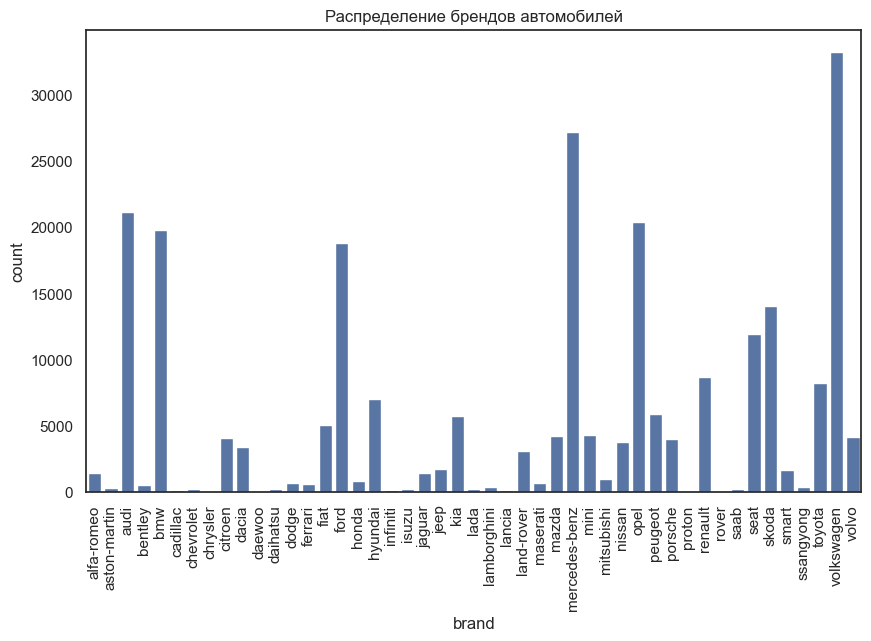

In [12]:
sns.set(style = 'white')
plt.figure(figsize=(10,6))
sns.countplot(x='brand', data=df)
plt.xticks(rotation=90)
plt.title('Распределение брендов автомобилей')
plt.show();

У нас получается, что посчитать основные статистические методы мы можем только для price_in_euro и mileage_in_km.


In [13]:
# Найдем выбросы в данных
Q11 = df['price_in_euro'].quantile(0.25)
Q33 = df['price_in_euro'].quantile(0.75)
IQR = Q33 - Q11

lower_bound = Q11 - 1.5 * IQR
upper_bound = Q33 + 1.5 * IQR

print("Выбросы в столбце 'price_in_euro':")
sort_df = df[(df['price_in_euro'] < lower_bound) | (df['price_in_euro'] > upper_bound)]
sort_df



Выбросы в столбце 'price_in_euro':


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
27,27,alfa-romeo,Alfa Romeo,black,09/1997,1997,99900.0,152,207,Manual,Petrol,NaN,- (g/km),72260.0,RZ Zagato Spider | NR.172 | SAMMLER | IL MOSTRO
332,332,alfa-romeo,Alfa Romeo 8C,white,10/2009,2009,249450.0,331,450,Automatic,Petrol,NaN,- (g/km),13128.0,Spider * deutsche Auslieferung *
367,367,alfa-romeo,Alfa Romeo 8C,white,03/2010,2010,249000.0,331,450,Semi-automatic,Petrol,"16,8 l/100 km",379 g/km,29400.0,"Spider, limitierte Serie"
420,420,alfa-romeo,Alfa Romeo 8C,white,04/2011,2011,289890.0,331,450,Automatic,Petrol,NaN,- (g/km),3084.0,Spider 1 of 500 I Carbon I 1. Hand I 3084 km
479,479,alfa-romeo,Alfa Romeo MiTo,red,12/2013,2013,259900.0,51,69,Manual,Petrol,"5,8 l/100 km",134 g/km,119377.0,1.4 8V Impression aus 1.Hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251071,251071,volvo,Volvo XC60,silver,04/2023,2023,81350.0,228,310,Automatic,Hybrid,"7,4 l/100 km",167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990.0,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690.0,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521.0,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"


In [14]:
Q1 = df['mileage_in_km'].quantile(0.25)
Q3 = df['mileage_in_km'].quantile(0.75)
IQR1 = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR1
upper_bound = Q3 + 1.5 * IQR1

print("Выбросы в столбце 'mileage_in_km':")
sort_df = df[(df['mileage_in_km'] < lower_bound) | (df['mileage_in_km'] > upper_bound)]
sort_df

Выбросы в столбце 'mileage_in_km':


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
12,12,alfa-romeo,Alfa Romeo GTV,silver,04/1996,1996,2290.0,110,150,Manual,Petrol,"9,5 l/100 km",- (g/km),333500.0,GTV 2.0 Twin Spark 16V
126,126,alfa-romeo,Alfa Romeo GT,black,07/2004,2004,1700.0,110,150,Manual,Diesel,"6,2 l/100 km",- (g/km),418000.0,1.9 JTD M-Jet Progression
157,157,alfa-romeo,Alfa Romeo GT,black,09/2005,2005,1500.0,110,150,Manual,Diesel,"6,2 l/100 km",165 g/km,280000.0,1.9 JTD M-Jet Distinctive
159,159,alfa-romeo,Alfa Romeo GT,black,09/2005,2005,1200.0,110,150,Manual,Diesel,"6,2 l/100 km",165 g/km,335000.0,1.9 JTD M-Jet Distinctive
170,170,alfa-romeo,Alfa Romeo,blue,08/2006,2006,2980.0,110,150,Manual,Diesel,"6,1 l/100 km",162 g/km,284048.0,Distinctive+NAVI+AHK+KLIMA+SITZHEIZUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247503,247503,volvo,Volvo XC90,black,12/2016,2016,16499.0,300,408,Automatic,Hybrid,"2,1 l/100 km",49 g/km,299000.0,T8 Inscription Plug-In Hybrid AWD 7 Sitzer
247524,247524,volvo,Volvo V70,black,02/2016,2016,10000.0,110,150,Automatic,Diesel,"4,1 l/100 km",109 g/km,297002.0,Kombi Linje Svart*Xenon*Automatik*Aluräder*
247697,247697,volvo,Volvo V90 Cross Country,black,11/2017,2017,20000.0,173,235,Automatic,Diesel,"5,3 l/100 km",139 g/km,360000.0,"2,0d AWD LEDER LED KAMERA ACC"
247763,247763,volvo,Volvo V90 Cross Country,black,05/2017,2017,20000.0,140,190,Automatic,Diesel,"5,2 l/100 km",138 g/km,285000.0,AWD*LEDER*DISTRONIC*SHZ*AHK*E6


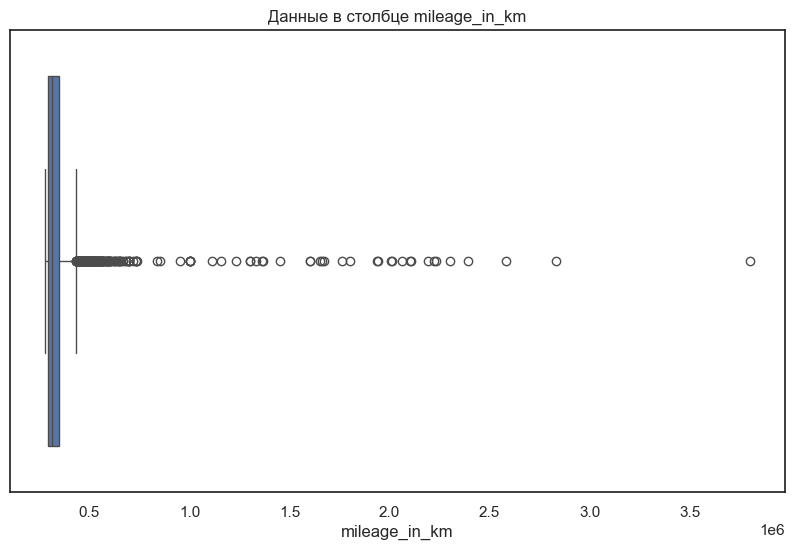

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sort_df['mileage_in_km'])
plt.title("Данные в столбце mileage_in_km")
plt.show()

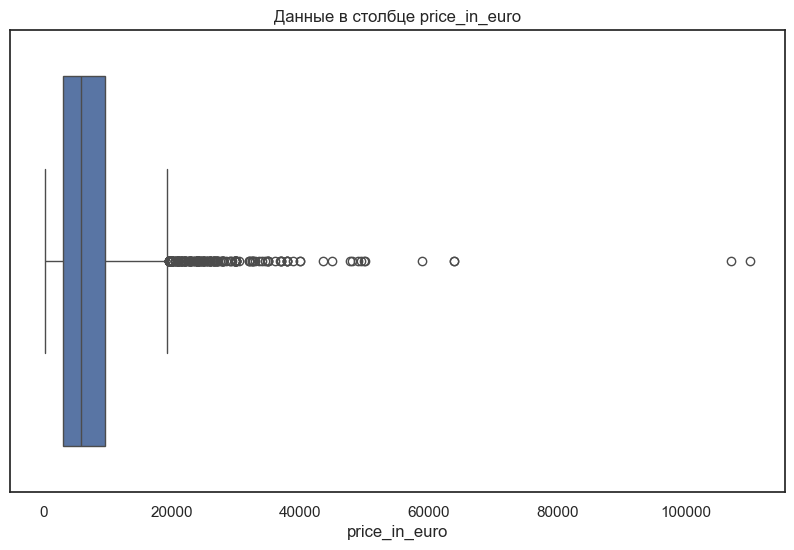

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sort_df['price_in_euro'])
plt.title("Данные в столбце price_in_euro")
plt.show()

Визуализируя данные с помощью диаграмм коробки (boxplot), мы можем увидеть, как выбросы влияют на распределение данных. Диаграмма коробки показывает среднее значение, медиану, нижнюю и верхнюю границу интерквартильного диапазона, а также значительные отклонения.

Метод Икваниль (Interquartile Range, IQR) является простым методом для обнаружения выбросов. Он рассчитывает интервал между нижней и верхней границами, который не включает в себя значимые отклонения. Если значение находится за пределами этого интервала, оно считается выбросом.

В нашем случае мы используем коэффициент 1,5 для определения значимых отклонений. Это означает, что если значение находится дальше от среднего значения на 1,5*IQR, оно считается выбросом.

**Причины выбросов:**

* В столбце `price_in_euro` выброс может быть вызван ошибкой при сборе или обработке данных. Например, может быть что-то не так с форматированием цены.
* В столбце `mileage_in_km` выбросы могут быть связаны с тем, что данные были собраны для автомобилей разных типов или с разными характеристиками.
* Другие возможные причины выбросов:
	+ Ошибки при вводе данных.
	+ Неправильное форматирование данных.
	+ Изменения в политике компании по сбору или обработке данных.


In [17]:
#Продолжаем анализ данных
#Мы анализируем для sort_df
# Анализ столбца `price_in_euro`
mean_price = sort_df['price_in_euro'].mean()
median_price = sort_df['price_in_euro'].median()
std_price = np.std(sort_df['price_in_euro'])
cv_price = std_price / mean_price * 100
var_price = np.var(sort_df['price_in_euro'])

print(f'Средняя цена в евро: {mean_price:.2f}\n'
      f'Медианная цена в евро: {median_price:.2f}\n'
      f'Стандартное отклонение цены в евро: {std_price:.2f}\n'
      f'Коэффициент вариации цены в евро: {cv_price:.2f}\n'
      f'Дисперсия цены в евро: {var_price:.2f}\n'
      )

Средняя цена в евро: 7272.01
Медианная цена в евро: 5888.00
Стандартное отклонение цены в евро: 6203.21
Коэффициент вариации цены в евро: 85.30
Дисперсия цены в евро: 38479774.31



In [18]:
# Анализ столбца `mileage_in_km`
mean_mileage = df['mileage_in_km'].mean()
median_mileage = df['mileage_in_km'].median()
std_mileage = np.std(df['mileage_in_km'])
cv_mileage = std_mileage / mean_mileage
var_mileage = np.var(df['mileage_in_km'])

print(f'Средний пробег в км: {mean_mileage:.2f}\n'
      f'Медианный пробег в км: {median_mileage:.2f}\n'
      f'Стандартное отклонение пробега в км: {std_mileage:.2f}\n'
      f'Коэффициент вариации пробега в км: {cv_mileage:.2f}\n'
      f'Дисперсия пробега в км: {var_mileage:.2f}\n'
      )

Средний пробег в км: 85340.02
Медианный пробег в км: 67500.00
Стандартное отклонение пробега в км: 78716.90
Коэффициент вариации пробега в км: 0.92
Дисперсия пробега в км: 6196351039.38



In [19]:
# Анализ столбцов `brand` и `model`
brand_counts = sort_df['brand'].value_counts()
model_counts = sort_df['model'].value_counts()
for brand, count in brand_counts.items():
      print(f"{brand}: {count:.2f}%")

mercedes-benz: 1426.00%
volkswagen: 1271.00%
bmw: 878.00%
audi: 725.00%
ford: 232.00%
opel: 218.00%
skoda: 128.00%
renault: 91.00%
volvo: 63.00%
toyota: 61.00%
peugeot: 53.00%
fiat: 37.00%
citroen: 32.00%
seat: 24.00%
porsche: 21.00%
hyundai: 19.00%
saab: 18.00%
nissan: 15.00%
kia: 13.00%
land-rover: 10.00%
alfa-romeo: 9.00%
mazda: 9.00%
dacia: 8.00%
lancia: 5.00%
daewoo: 4.00%
mitsubishi: 4.00%
jeep: 3.00%
jaguar: 3.00%
cadillac: 3.00%
smart: 3.00%
honda: 3.00%
rover: 2.00%
mini: 2.00%
infiniti: 2.00%
isuzu: 2.00%
dodge: 1.00%
ssangyong: 1.00%
maserati: 1.00%


Вопрос 1: Какие модели автомобилей наиболее часто встречаются в данных?
Выборка содержит топ-30 моделей автомобилей.

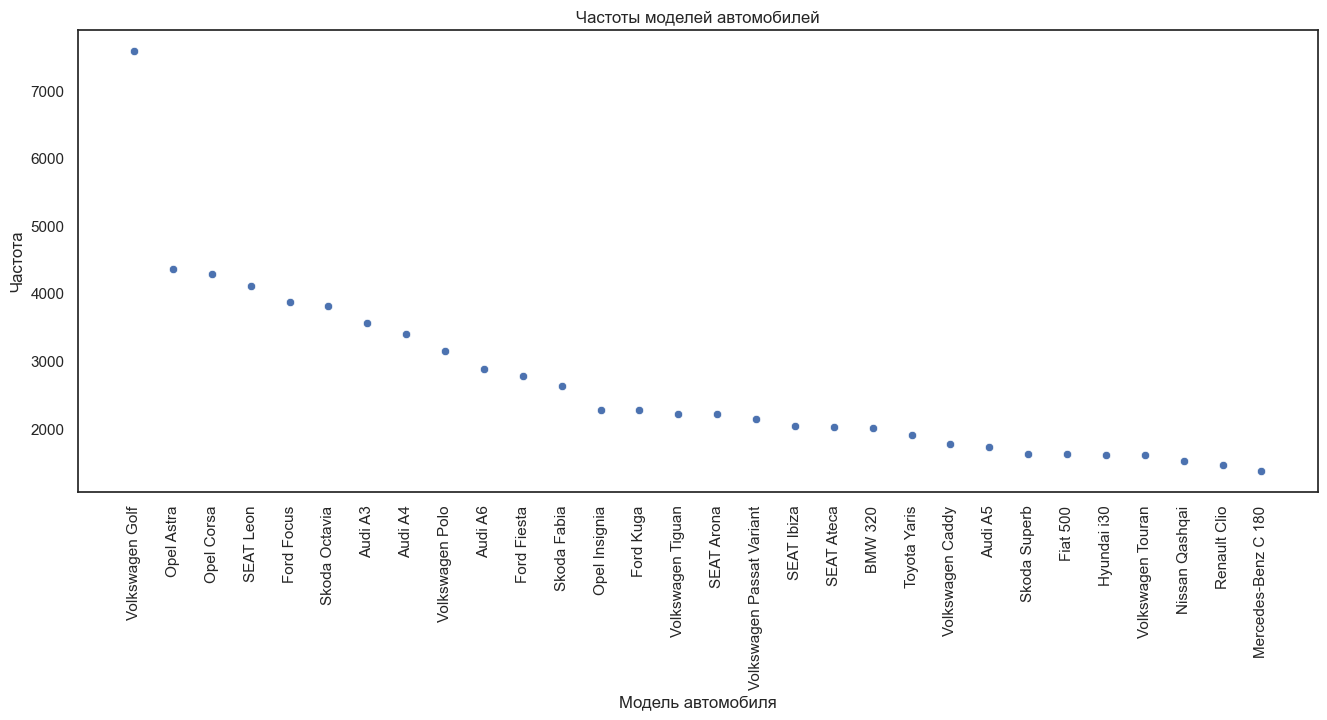

In [20]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['model'].value_counts()[:30].index, y=df['model'].value_counts()[:30].values)
#plt.scatter(x=df['model'].value_counts().index, y=df['model'].value_counts().values)
plt.title('Частоты моделей автомобилей')
plt.xlabel('Модель автомобиля')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show();

Вопрос 2: Какая доля автомобилей выпущена каждым годом?

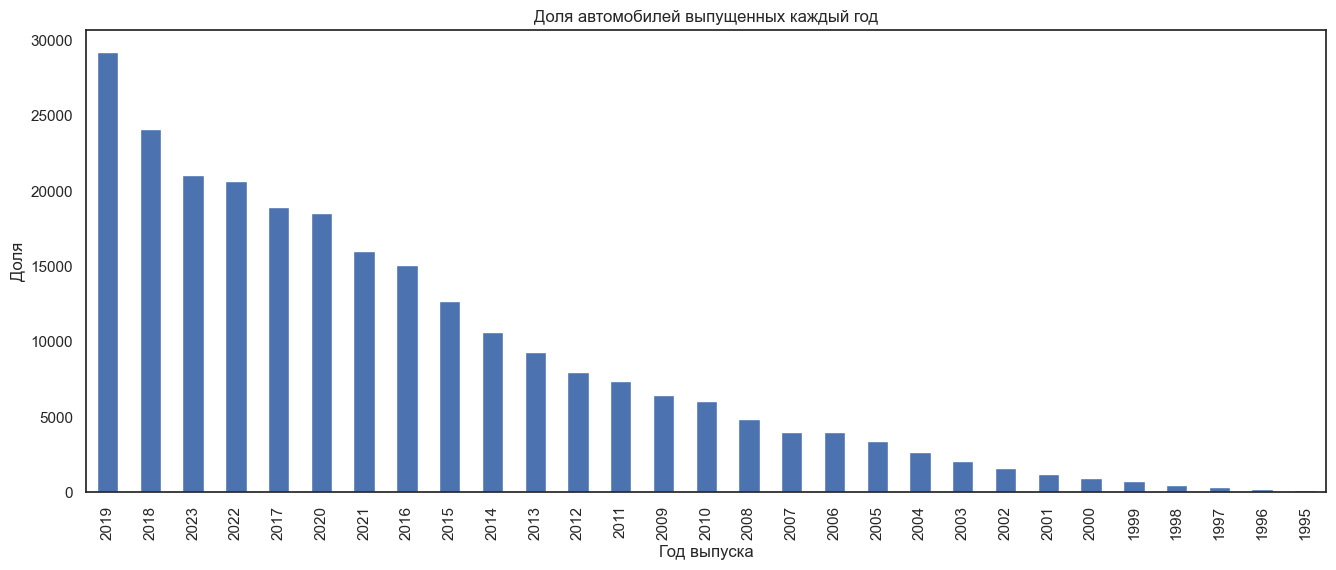

In [21]:
plt.figure(figsize=(16,6))
df['year'].value_counts()[:29].plot(kind='bar')
plt.title('Доля автомобилей выпущенных каждый год')
plt.xlabel('Год выпуска')
plt.ylabel('Доля')
plt.show()

Вопрос 3: Как меняется средняя цена автомобиля с увеличением пробега?

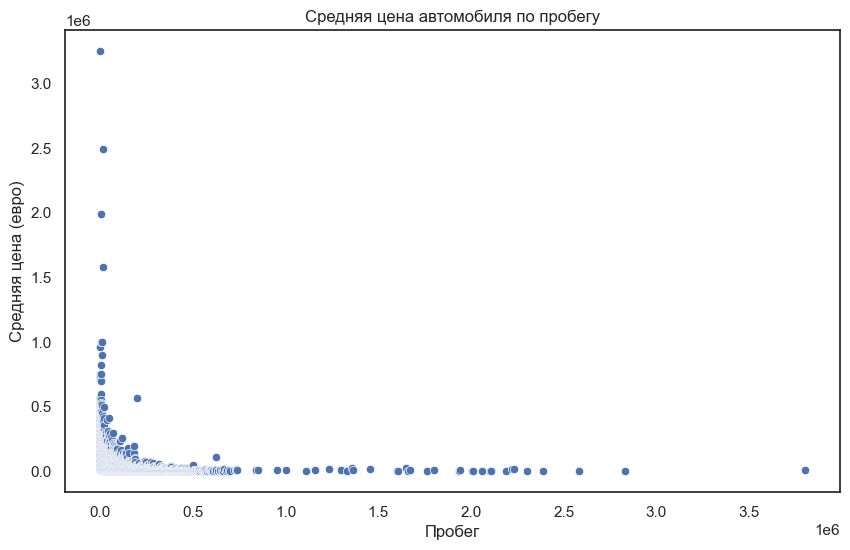

In [22]:
plt.figure(figsize=(10,6))
df_grouped = df.groupby('mileage_in_km')['price_in_euro'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='mileage_in_km')

sns.scatterplot(x=df_grouped['mileage_in_km'], y=df_grouped['price_in_euro'])
plt.title('Средняя цена автомобиля по пробегу')
plt.xlabel('Пробег')
plt.ylabel('Средняя цена (евро)')
plt.show()

Вопрос 4: Какая марка автомобиля наиболее распространена среди самых дорогих моделей?

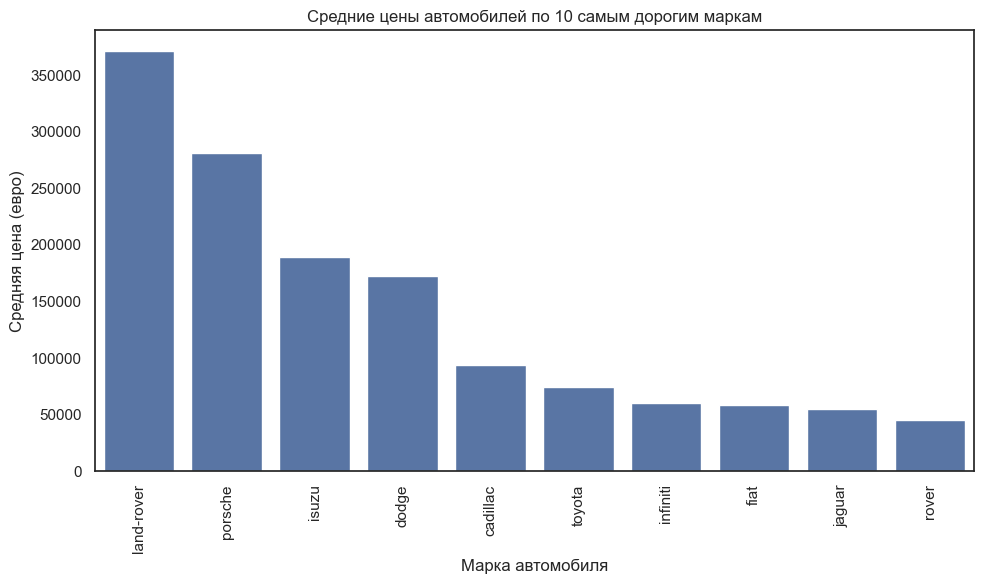

In [23]:
top_brands = sort_df.groupby('brand')['price_in_euro'].mean().nlargest(10).index

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands, y=df.groupby('brand')['price_in_euro'].mean().nlargest(10).values)

plt.title('Средние цены автомобилей по 10 самым дорогим маркам')
plt.xlabel('Марка автомобиля')
plt.ylabel('Средняя цена (евро)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 Вопрос 5: Как распределены автомобили по пробегу?

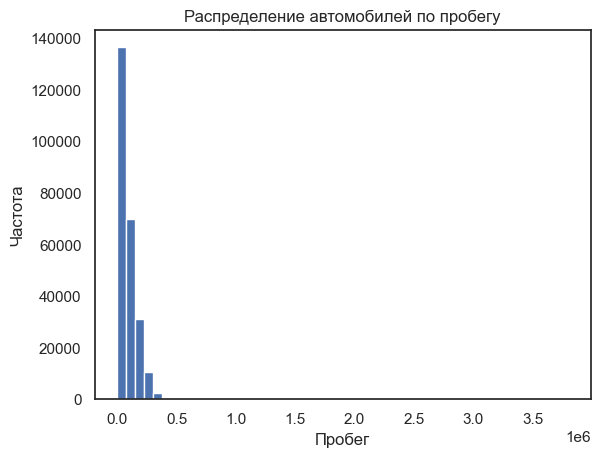

In [24]:
df['mileage_in_km'].plot(kind='hist', bins=50)
plt.title('Распределение автомобилей по пробегу')
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.show()

In [25]:
df['price_in_euro'] = df.groupby('brand')['price_in_euro'].transform(lambda x: x.fillna(x.mean()))
df['mileage_in_km'] = df.groupby('brand')['mileage_in_km'].transform(lambda x: x.fillna(x.mean()))
df['color'] = df.groupby('brand')['color'].transform(lambda x: x.fillna(x.mode()))
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990.0,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690.0,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521.0,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890.0,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [26]:
df[['price_in_euro', 'mileage_in_km']].isnull().sum()

price_in_euro    0
mileage_in_km    0
dtype: int64

In [27]:
df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

In [28]:
df[['power_kw', 'power_ps']]

,power_kw,power_ps
0,148.0,201.0
1,191.0,260.0
2,110.0,150.0
3,110.0,150.0
4,132.0,179.0
...,...,...
251074,192.0,261.0
251075,173.0,235.0
251076,145.0,197.0
251077,132.0,179.0


In [29]:
df['power_kw'] = df.groupby('brand')['power_kw'].transform(lambda x: x.fillna(x.mean()))
df['power_ps'] = df.groupby('brand')['power_ps'].transform(lambda x: x.fillna(x.mean()))
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990.0,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690.0,173.0,235.0,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521.0,145.0,197.0,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890.0,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


Мы заполнили пропущенные значения через средние значения, чтобы:

1. **Убрать влияние аномалий**: Если в данных есть аномальные или неточные значения, они могут оказывать существенное влияние на результаты анализа. Среднее значение помогает сгладить эти аномалии и получить более точный представление о зависимости цены от мощности.
2. **Снизить дисперсию**: Пропущенные значения могут увеличивать дисперсию данных, что может привести к неточным результатам анализа. Среднее значение помогает уменьшить дисперсию и получить более стабильную зависимость.
3. **Повысить точность**: Использование среднего значения вместо других методов заполнения пропущенных значений (например, медианы или модальных значений) может привести к более точным результатам анализа.
4. **Упростить анализ**: Среднее значение является простым и легко понятным способом заполнения пропущенных значений, что упрощает анализ и позволяет фокусироваться на основной зависимости цены от мощности.

In [30]:
df[['power_kw', 'power_ps']].isnull().sum()

power_kw    0
power_ps    0
dtype: int64

In [31]:
df.describe()

,Unnamed: 0,price_in_euro,power_kw,power_ps,mileage_in_km
count,251079.000000,2.510790e+05,251079.000000,251079.000000,2.510790e+05
mean,125539.000000,2.613961e+04,126.481582,171.828371,8.533205e+04
std,72480.408456,3.697787e+04,75.302790,99.214845,7.869643e+04
min,0.000000,1.200000e+02,1.000000,1.000000,0.000000e+00
25%,62769.500000,1.199000e+04,82.000000,111.000000,2.494150e+04
50%,125539.000000,1.989000e+04,110.000000,150.000000,6.750000e+04
75%,188308.500000,2.995000e+04,140.000000,190.000000,1.264525e+05
max,251078.000000,5.890500e+06,2023.000000,2022.000000,3.800000e+06


In [32]:
df_statitscs.describe()

,Unnamed: 0,price_in_euro,mileage_in_km
count,251079.000000,2.508800e+05,2.509270e+05
mean,125539.000000,2.613753e+04,8.534002e+04
std,72480.408456,3.698795e+04,7.871706e+04
min,0.000000,1.200000e+02,0.000000e+00
25%,62769.500000,1.199000e+04,2.490400e+04
50%,125539.000000,1.989000e+04,6.750000e+04
75%,188308.500000,2.995000e+04,1.265000e+05
max,251078.000000,5.890500e+06,3.800000e+06


Сейчас мы сделаем сравнительную статистику до и после обработки данных. Посчитаем основные статистики

In [33]:
#До обработки данных
mean_price_before = df_statitscs['price_in_euro'].mean()
median_price_before = df_statitscs['price_in_euro'].median()
std_price_before = np.std(df_statitscs['price_in_euro'])
cv_price_before = std_price / mean_price * 100
var_price_before = np.var(df_statitscs['price_in_euro'])

mean_mileage_before = df_statitscs['mileage_in_km'].mean()
median_mileage_before = df_statitscs['mileage_in_km'].median()
std_mileage_before = np.std(df_statitscs['mileage_in_km'])
cv_mileage_before = std_mileage / mean_mileage * 100
var_mileage_before = np.var(df_statitscs['mileage_in_km'])

print(f'Средняя цена в евро до обработки данных: {mean_price_before:.2f}\n'
      f'Медианная цена в евро до обработки данных: {median_price_before:.2f}\n'
      f'Стандартное отклонение цены в евро до обработки данных: {std_price_before:.2f}\n'
      f'Коэффициент вариации цены в евро до обработки данных: {cv_price_before:.2f}\n'
      f'Дисперсия цены в евро до обработки данных: {var_price_before:.2f}\n'
      f'----------------------------------------------------------------\n'
      f'Средний пробег в км до обработки данных: {mean_mileage_before:.2f}\n'
      f'Медианный пробег в км до обработки данных: {median_mileage_before:.2f}\n'
      f'Стандартное отклонение пробега в км до обработки данных: {std_mileage_before:.2f}\n'
      f'Коэффициент вариации пробега в км до обработки данных: {cv_mileage_before:.2f}\n'
      f'Дисперсия пробега в км до обработки данных: {var_mileage_before:.2f}\t'
      )

Средняя цена в евро до обработки данных: 26137.53
Медианная цена в евро до обработки данных: 19890.00
Стандартное отклонение цены в евро до обработки данных: 36987.88
Коэффициент вариации цены в евро до обработки данных: 85.30
Дисперсия цены в евро до обработки данных: 1368103278.53
----------------------------------------------------------------
Средний пробег в км до обработки данных: 85340.02
Медианный пробег в км до обработки данных: 67500.00
Стандартное отклонение пробега в км до обработки данных: 78716.90
Коэффициент вариации пробега в км до обработки данных: 92.24
Дисперсия пробега в км до обработки данных: 6196351039.38	


In [34]:
# После обработки данных
mean_price_after = df['price_in_euro'].mean()
median_price_after = df['price_in_euro'].median()
std_price_after = np.std(df['price_in_euro'])
cv_price_after = std_price / mean_price * 100
var_price_after = np.var(df['price_in_euro'])

mean_mileage_after = df['mileage_in_km'].mean()
median_mileage_after = df['mileage_in_km'].median()
std_mileage_after = np.std(df['mileage_in_km'])
cv_mileage_after = std_mileage / mean_mileage * 100
var_mileage_after = np.var(df['mileage_in_km'])
#Т.к у нас добавилось еще две колонки, то нужно по ним посчитать основные характеристики
mean_power_kw_after = df['power_kw'].mean()
median_power_kw_after = df['power_kw'].median()
std_power_kw_after = np.std(df['power_kw'])
cv_power_kw_after = std_power_kw_after/ mean_power_kw_after * 100
var_power_kw_after = np.var(df['power_kw'])

mean_power_ps_after = df['power_ps'].mean()
median_power_ps_after = df['power_ps'].median()
std_power_ps_after = np.std(df['power_ps'])
cv_power_ps_after = std_power_ps_after/ mean_power_ps_after * 100
var_power_ps_after = np.var(df['power_ps'])

print(f'Средняя цена в евро после обработки данных: {mean_price_after:.2f}\n'
      f'Медианная цена в евро после обработки данных: {median_price_after:.2f}\n'
      f'Стандартное отклонение цены в евро после обработки данных: {std_price_after:.2f}\n'
      f'Коэффициент вариации цены в евро после обработки данных: {cv_price_after:.2f}\n'
      f'Дисперсия цены в евро после обработки данных: {var_price_after:.2f}\n'
      f'----------------------------------------------------------------\n'
      f'Средний пробег в км после обработки данных: {mean_mileage_after:.2f}\n'
      f'Медианный пробег в км после обработки данных: {median_mileage_after:.2f}\n'
      f'Стандартное отклонение пробега в км после обработки данных: {std_mileage_after:.2f}\n'
      f'Коэффициент вариации пробега в км после обработки данных: {cv_mileage_after:.2f}\n'
      f'Дисперсия пробега в км после обработки данных: {var_mileage_after:.2f}\n'
      f'----------------------------------------------------------------\n'
      f'Средняя мощность двигателя в кВт после обработки данных: {mean_power_kw_after:.2f}\n'
      f'Медианная мощность двигателя в кВт после обработки данных: {median_power_kw_after:.2f}\n'
      f'Стандартное отклонение мощности двигателя в кВт после обработки данных: {std_power_kw_after:.2f}\n'
      f'Коэффициент вариации мощности двигателя в кВт после обработки данных: {cv_power_kw_after:.2f}\n'
      f'Дисперсия мощности двигателя в кВт после обработки данных: {var_power_kw_after:.2f}\n'
      f'----------------------------------------------------------------\n'
      f'Средняя мощность двигателя в л.с. после обработки данных: {mean_power_ps_after:.2f}\n'
      f'Медианная мощность двигателя в л.с. после обработки данных: {median_power_ps_after:.2f}\n'
      f'Стандартное отклонение мощности двигателя в л.с. после обработки данных: {std_power_ps_after:.2f}\n'
      f'Коэффициент вариации мощности двигателя в л.с. после обработки данных: {cv_power_ps_after:.2f}\n'
      f'Дисперсия мощности двигателя в л.с. после обработки данных: {var_power_ps_after:.2f}\t'
      )

Средняя цена в евро после обработки данных: 26139.61
Медианная цена в евро после обработки данных: 19890.00
Стандартное отклонение цены в евро после обработки данных: 36977.80
Коэффициент вариации цены в евро после обработки данных: 85.30
Дисперсия цены в евро после обработки данных: 1367357478.04
----------------------------------------------------------------
Средний пробег в км после обработки данных: 85332.05
Медианный пробег в км после обработки данных: 67500.00
Стандартное отклонение пробега в км после обработки данных: 78696.27
Коэффициент вариации пробега в км после обработки данных: 92.24
Дисперсия пробега в км после обработки данных: 6193103630.19
----------------------------------------------------------------
Средняя мощность двигателя в кВт после обработки данных: 126.48
Медианная мощность двигателя в кВт после обработки данных: 110.00
Стандартное отклонение мощности двигателя в кВт после обработки данных: 75.30
Коэффициент вариации мощности двигателя в кВт после обработки

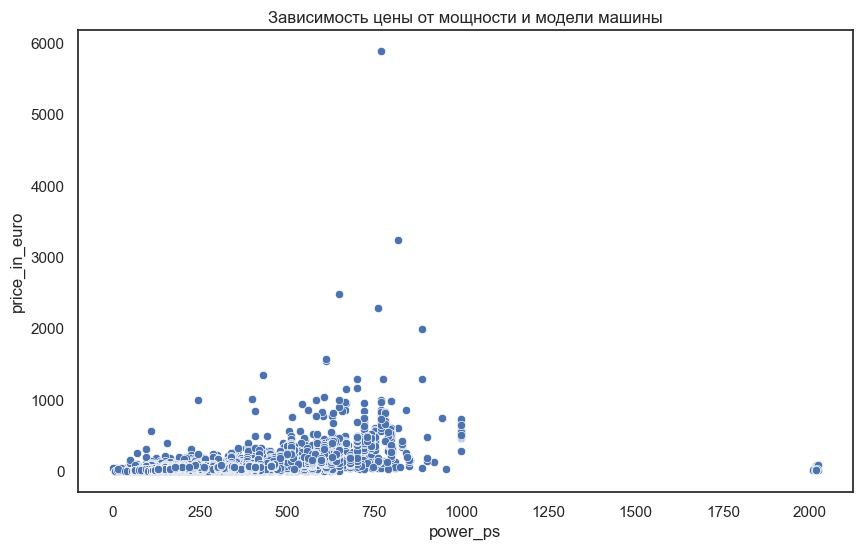

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'power_ps', y = df['price_in_euro']/1000, data = df)
#sns.boxplot(x = 'brand', y = 'price_in_euro', data = df)
plt.title('Зависимость цены от мощности и модели машины')
plt.show()

In [63]:
df_power_ps_1850 = df[df['power_ps'] < 1850].copy()
df_power_ps_1850

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990.0,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690.0,173.0,235.0,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521.0,145.0,197.0,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890.0,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


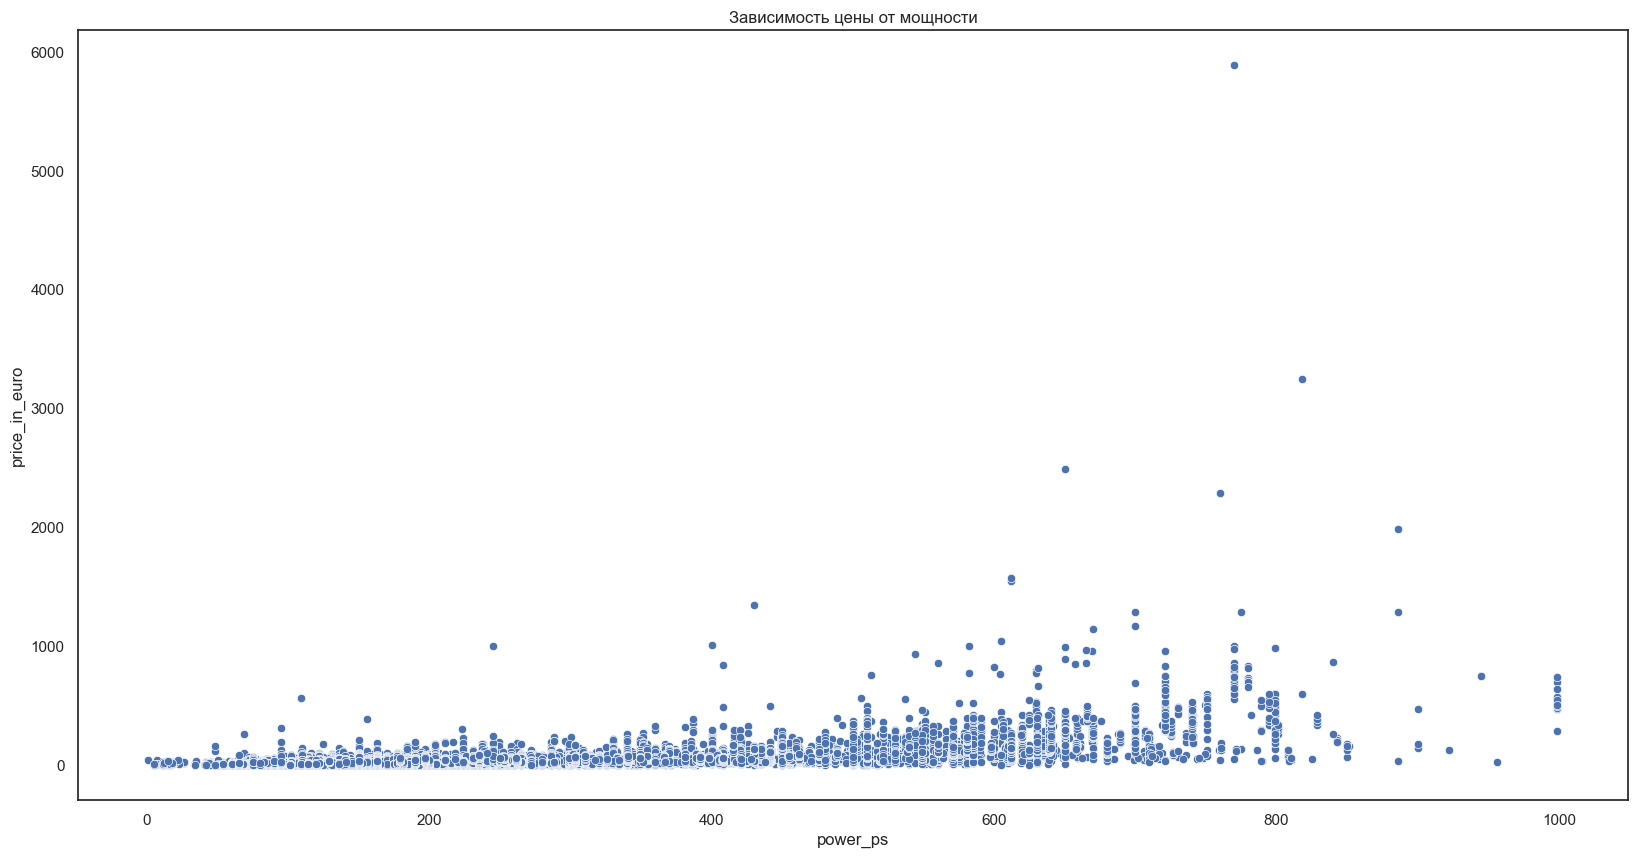

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'power_ps', y = df_power_ps_1850['price_in_euro']/1000, data = df_power_ps_1850)
plt.title('Зависимость цены от мощности')
plt.show()

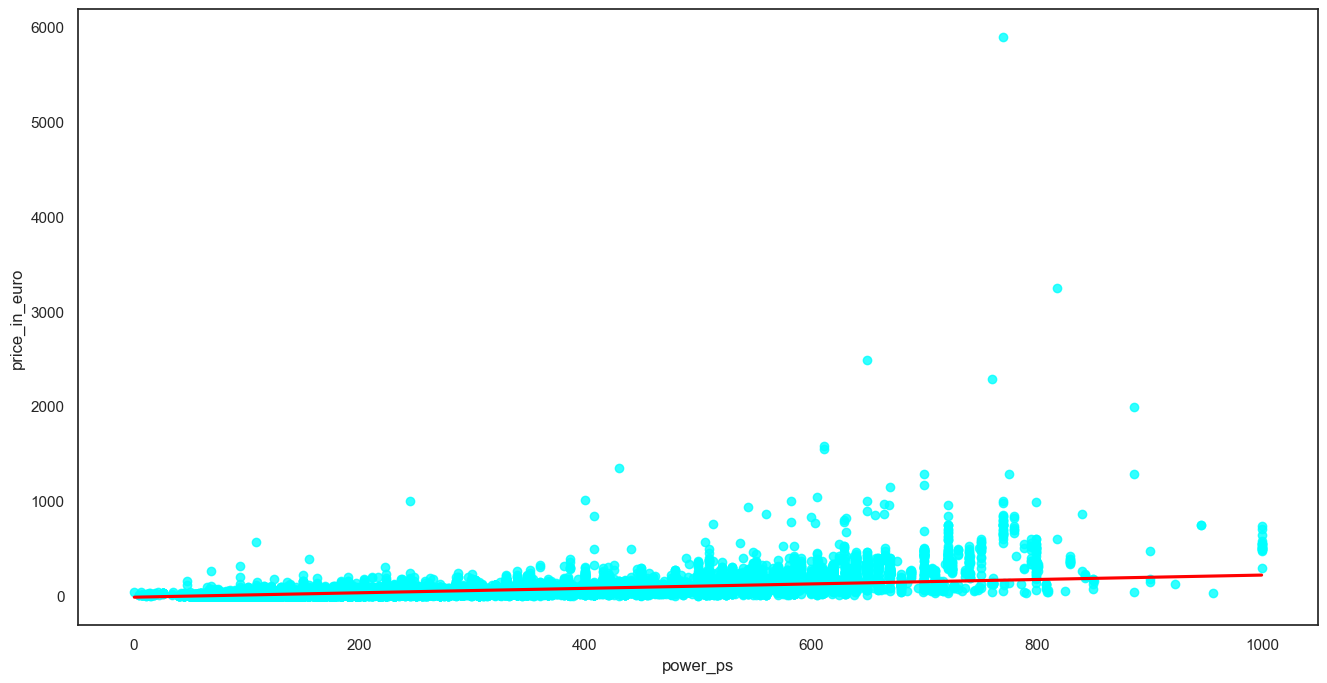

In [39]:
plt.figure(figsize=(16,8))
sns.regplot(x = 'power_ps', y = df_power_ps_1850['price_in_euro']/1000, data = df_power_ps_1850,
            scatter_kws = {'color': 'cyan'},
            line_kws = {'color': 'red'},
            ci = 90, truncate = True)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

X = df.drop(['Unnamed: 0', 'color', 'registration_date','price_in_euro', 'power_kw',
             'transmission_type', 'fuel_type', 'fuel_consumption_g_km', 
             'fuel_consumption_l_100km', 'offer_description','brand','model','year'], axis = 1)
y = df['price_in_euro']
X

,power_ps,mileage_in_km
0,201.0,160500.0
1,260.0,190000.0
2,150.0,129000.0
3,150.0,189500.0
4,179.0,96127.0
...,...,...
251074,261.0,1229.0
251075,235.0,4900.0
251076,197.0,1531.0
251077,179.0,1500.0


In [51]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

base_elastice_model = ElasticNet()
param_grid = {'alpha':[0.01,  0.02,  0.03,  0.04,  0.05, 0.5 ,
                       1.0, 2.0, 3.0, 5.0, 10.0,15.0, 20.0, 30.0,50.0, 100.0],
              'l1_ratio':[0.1,0.5,1.0]
              }
                  

grid_model = GridSearchCV(estimator= base_elastice_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 10, verbose = 2)
grid_model.fit(X_train, y_train)
grid_model.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

{'alpha': 10.0, 'l1_ratio': 1.0}

In [52]:
parametres_of_model = pd.DataFrame(grid_model.cv_results_)
parametres_of_model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013381,0.001352,0.000995,0.000031,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-8.331177e+08,-5.365035e+08,-6.241301e+08,-2.488623e+09,-4.971147e+08,-9.010197e+08,-5.024013e+08,-1.110943e+09,-5.216885e+08,-6.414146e+08,-8.656956e+08,5.744168e+08,18
1,0.012563,0.000978,0.000914,0.000307,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-8.334633e+08,-5.367110e+08,-6.239209e+08,-2.488179e+09,-4.971715e+08,-9.008484e+08,-5.023545e+08,-1.110666e+09,-5.219264e+08,-6.414486e+08,-8.656690e+08,5.742574e+08,16
2,0.011975,0.000729,0.000914,0.000309,0.01,1.0,"{'alpha': 0.01, 'l1_ratio': 1.0}",-8.339249e+08,-5.369979e+08,-6.236812e+08,-2.487645e+09,-4.972663e+08,-9.006578e+08,-5.023193e+08,-1.110340e+09,-5.222515e+08,-6.415148e+08,-8.656599e+08,5.740565e+08,12
3,0.011400,0.001099,0.000906,0.000303,0.02,0.1,"{'alpha': 0.02, 'l1_ratio': 0.1}",-8.324150e+08,-5.361055e+08,-6.246550e+08,-2.489668e+09,-4.970463e+08,-9.014644e+08,-5.025656e+08,-1.111620e+09,-5.212231e+08,-6.413975e+08,-8.658160e+08,5.747710e+08,21
4,0.012416,0.001311,0.000797,0.000398,0.02,0.5,"{'alpha': 0.02, 'l1_ratio': 0.5}",-8.330345e+08,-5.364546e+08,-6.241847e+08,-2.488735e+09,-4.971030e+08,-9.010651e+08,-5.024156e+08,-1.111015e+09,-5.216321e+08,-6.414086e+08,-8.657049e+08,5.744564e+08,19
5,0.011833,0.000740,0.000998,0.000448,0.02,1.0,"{'alpha': 0.02, 'l1_ratio': 1.0}",-8.339249e+08,-5.369979e+08,-6.236812e+08,-2.487645e+09,-4.972663e+08,-9.006578e+08,-5.023193e+08,-1.110340e+09,-5.222515e+08,-6.415148e+08,-8.656599e+08,5.740565e+08,11
6,0.012132,0.000956,0.000798,0.000399,0.03,0.1,"{'alpha': 0.03, 'l1_ratio': 0.1}",-8.318120e+08,-5.357993e+08,-6.252520e+08,-2.490776e+09,-4.970570e+08,-9.019874e+08,-5.028078e+08,-1.112365e+09,-5.208506e+08,-6.414594e+08,-8.660167e+08,5.751194e+08,24
7,0.012745,0.000367,0.000798,0.000399,0.03,0.5,"{'alpha': 0.03, 'l1_ratio': 0.5}",-8.326379e+08,-5.362278e+08,-6.244719e+08,-2.489312e+09,-4.970601e+08,-9.013072e+08,-5.025019e+08,-1.111386e+09,-5.213677e+08,-6.413942e+08,-8.657667e+08,5.746536e+08,20
8,0.011851,0.001115,0.000996,0.000005,0.03,1.0,"{'alpha': 0.03, 'l1_ratio': 1.0}",-8.339248e+08,-5.369978e+08,-6.236812e+08,-2.487645e+09,-4.972663e+08,-9.006578e+08,-5.023193e+08,-1.110340e+09,-5.222515e+08,-6.415148e+08,-8.656599e+08,5.740565e+08,10
9,0.011718,0.001090,0.001198,0.000400,0.04,0.1,"{'alpha': 0.04, 'l1_ratio': 0.1}",-8.313037e+08,-5.355804e+08,-6.259173e+08,-2.491944e+09,-4.971430e+08,-9.025848e+08,-5.031242e+08,-1.113177e+09,-5.205664e+08,-6.415963e+08,-8.662937e+08,5.754621e+08,25


In [53]:
y_pred = grid_model.predict(X_test)

mean_squared_error(y_test, y_pred)

565740188.3451216

In [61]:
%%time
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import cross_validate

model = Ridge(alpha= 30.0)
scores = cross_validate(model, X_train, y_train, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], cv = 10)

model_two = Ridge(alpha=1)

scores_two= cross_validate(model_two, X_train, y_train, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], cv = 10)

scores_two = pd.DataFrame(scores_two)
scores_two.mean()
model_two.fit(X_train, y_train)
y_final_test_two_pred = model_two.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_final_test_two_pred))

CPU times: total: 2.28 s
Wall time: 412 ms


24425.683693042047